<a href="https://colab.research.google.com/github/anayms9/data/blob/master/Copy_of_Motor_Experiment_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Do not edit first code cell

{'motor_shaft': {'mass': 0.11468069822664181, 'inertia': 2.0642525680795527e-06}, 'test_shaft': {'mass': 0.1645566231950334, 'inertia': 8.22783115975167e-06}, 'shaft_to_inertia': {'mass': 0.1337660856547039, 'inertia': 6.0254264452733105e-05}, 'test_wheel': {'mass': 1.5115458893481934, 'inertia': 0.007633306741208378}, 'brake_pad': {'mass': 0.5115769477105621, 'inertia': 0.004074454600040772}}
Braking torque applied is- 3.1149340866290016N-m
No load speed is- 14500RPM
Max torque that motor can provide is- 7.902866139735493N-m
Total rotational inertia of setup is- 0.011778307689429715kg-m^2


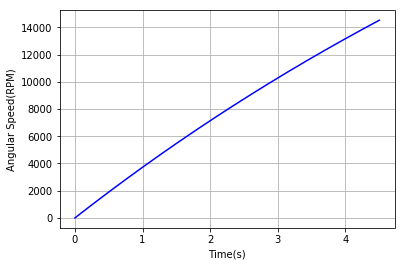

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


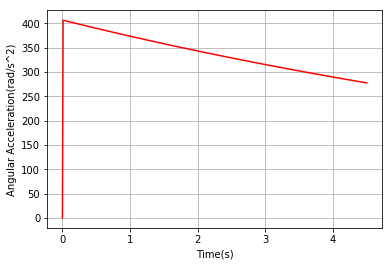

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr  7 12:44:48 2019

@author: Anay
"""

import numpy as np
from matplotlib import pyplot as plt

pi = np.pi
density = {'Al': 2700, 'Steel': 7800, 'Poly': 2000}
dimensions = {'motor_shaft':{'material':'Steel', 'dia_out': 0.012,'length': 0.130}, 
              'test_shaft':{'material':'Steel', 'dia_out': 0.020,'length': 0.194},
              'shaft_to_inertia':{'material':'Steel', 'dia_out': 0.0566, 'dia_in': 0.020, 'length': 0.0225}, 
              'test_wheel':{'material':'Steel', 'dia_out': 0.200, 'dia_in': 0.020, 'length': 0.018},
              'brake_pad':{'material':'Poly', 'dia_out': 0.200, 'dia_in': 0.154, 'length': 0.020}
              }
COF = {'Poly': 0.35}


components = [i for i in dimensions.keys()]
materials = [i for i in density.keys()]
KV_rating = 290
Kv = 1/(290*2*pi/60)
Kt = Kv

def inertia_estimator(dict):
  #dict refers to component dictionary
    if 'dia_out' in dict.keys():
        d2 = dict['dia_out']
        l = dict['length']
        d1 = 0
        if 'dia_in' in dict.keys():
          d1 = dict['dia_in']
        mass = density[dict['material']]*(pi/4)*(np.power(d2,2)-np.power(d1,2))*l
        inertia = mass*(np.power(d2/2,2) + np.power(d1/2,2))/2
    return mass, inertia

inertias = {}
for d in range(len(dimensions)):
    m,i = inertia_estimator(dimensions[components[d]])
    inertias[components[d]] = {'mass':m, 'inertia':i}    
print(inertias)

#Brake pad is modelled as a section of an annular
#Evalluating brake torque
N = 100
r2_brake = dimensions['brake_pad']['dia_out']/2
r1_brake = dimensions['brake_pad']['dia_in']/2
mu = COF[dimensions['brake_pad']['material']]
brakeTorque = mu*N*(2/3)*(r2_brake**2 + r2_brake*r1_brake + r1_brake**2)/(r2_brake + r1_brake)
print('Braking torque applied is- '+str(brakeTorque)+'N-m')

#battery voltage & current
Vb = 50
Ib = 240

maxRPM = KV_rating*Vb
print('No load speed is- '+str(maxRPM)+'RPM')

motorTorque = Kv*Ib
print('Max torque that motor can provide is- '+str(motorTorque)+'N-m')

totalInertia = sum([inertias[c]['inertia'] for c in components])
print('Total rotational inertia of setup is- '+str(totalInertia)+'kg-m^2')

#Bearing friction coefficient
B = 0.001
omega = [0]
alpha = [0]
time = [0]
dt = 0.01
eps = 1/np.power(10,3)

if motorTorque <= brakeTorque:
    Nreqd  = mu*(2/3)*(r2_brake**2 + r2_brake*r1_brake + r1_brake**2)/(r2_brake + r1_brake)
    Nreqd = motorTorque/Nreqd
    print('Reduce brake normal force to any value below- '+str(Nreqd)+'N')
else:
    #solving differential equation
    if B < 0.0001:
        print('Negligible bearing friction. Ignored!')
        while omega[-1] < maxRPM*2*pi/60:
            alpha.append((motorTorque-brakeTorque)/totalInertia)
            omega.append(omega[-1]+alpha[-1]*dt)
            time.append(time[-1]+dt)
    else:
        while omega[-1] < maxRPM*2*pi/60:
            if ((motorTorque-brakeTorque)/totalInertia) - (B*omega[-1]/totalInertia) > eps :
                alpha.append( ((motorTorque-brakeTorque)/totalInertia) - (B*omega[-1]/totalInertia) )
                omega.append(omega[-1]+alpha[-1]*dt)
                time.append(time[-1]+dt)

omega = np.array(omega)
omega = omega*60/(2*pi)
alpha = np.array(alpha)
time = np.array(time)
    

plt.plot(time,omega,'b')
plt.xlabel('Time(s)')
plt.ylabel('Angular Speed(RPM)')
plt.grid(True)
plt.show()
plt.close()

plt.plot(time,alpha,'r')
plt.xlabel('Time(s)')
plt.ylabel('Angular Acceleration(rad/s^2)')
plt.grid('True')
plt.show()
plt.close()






In [0]:
import numpy as np
from matplotlib import pyplot as plt

pi = np.pi
density = {'Al': 2700, 'Steel': 7800, 'Poly': 2000}
dimensions = {'motor_shaft':{'material':'Steel', 'dia_out': 0.012,'length': 0.130}, 
              'test_shaft':{'material':'Steel', 'dia_out': 0.020,'length': 0.194},
              'shaft_to_inertia':{'material':'Steel', 'dia_out': 0.0566, 'dia_in': 0.020, 'length': 0.0225}, 
              'test_wheel':{'material':'Steel', 'dia_out': 0.200, 'dia_in': 0.020, 'length': 0.018},
              'brake_pad':{'material':'Poly', 'dia_out': 0.200, 'dia_in': 0.154, 'length': 0.020}
              }
COF = {'Poly': 0.35}


components = [i for i in dimensions.keys()]
materials = [i for i in density.keys()]
KV_rating = 290
Kv = 1/(290*2*pi/60)
Kt = Kv

def inertia_estimator(dict):
  #dict refers to component dictionary
    if 'dia_out' in dict.keys():
        d2 = dict['dia_out']
        l = dict['length']
        d1 = 0
        if 'dia_in' in dict.keys():
          d1 = dict['dia_in']
        mass = density[dict['material']]*(pi/4)*(np.power(d2,2)-np.power(d1,2))*l
        inertia = mass*(np.power(d2/2,2) + np.power(d1/2,2))/2
    return mass, inertia

inertias = {}
for d in range(len(dimensions)):
    m,i = inertia_estimator(dimensions[components[d]])
    inertias[components[d]] = {'mass':m, 'inertia':i}    
print(inertias)


{'motor_shaft': {'mass': 0.11468069822664181, 'inertia': 2.0642525680795527e-06}, 'test_shaft': {'mass': 0.4753858003412076, 'inertia': 2.376929001706038e-05}, 'shaft_to_inertia': {'mass': 0.3864353585580335, 'inertia': 0.0001740678750856734}, 'test_wheel': {'mass': 4.3666881247836695, 'inertia': 0.022051775030157535}, 'brake_pad': {'mass': 0.5115769477105621, 'inertia': 0.004074454600040772}}
